# <font color="purple"><h4 align="center">Pandas Concat and Merge Tutorial</h4></font>

## <font color='blue'>Basic Concatenation</font>

In [1]:
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [2]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
df = pd.concat([india_weather, us_weather])
# it will combine the two dataframes into one
# this is row-wise concatenation
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>Ignore Index</font>

In [ ]:
df = pd.concat([india_weather, us_weather], ignore_index=True)
# it will combine the two dataframes into one and reset the index
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


## <font color='blue'>Concatenation And Keys</font>

In [ ]:
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
# it will combine the two dataframes into one and add a new index with keys
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [ ]:
df.loc["us"]
# this will return the data for the US weather dataframe

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
df.loc["india"]
# this will return the data for the India weather dataframe

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


## <font color='blue'>Concatenation Using Index</font>

In [ ]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [9]:
windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [ ]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
# it will combine the two dataframes into one based on the index
# this is column-wise concatenation
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


## <font color='blue'>Basic Merge Using a Dataframe Column</font>

In [11]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [12]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [ ]:
df3 = pd.merge(df1, df2, on="city")
# it will merge the two dataframes based on the "city" column
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>Type Of DataBase Joins</font>

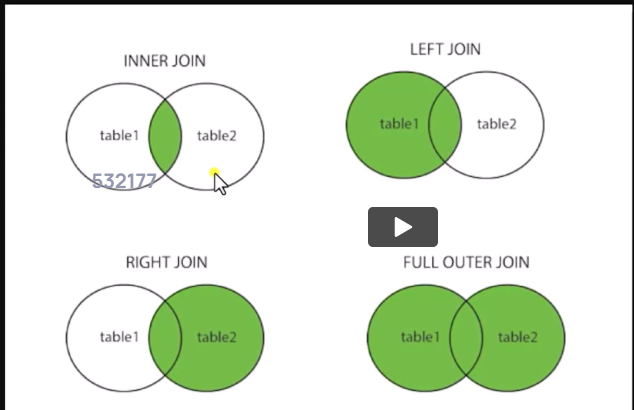

In [14]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [15]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [ ]:
df3=pd.merge(df1,df2,on="city",how="inner")
# it will merge the two dataframes based on the "city" column with an inner join
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [ ]:
df3=pd.merge(df1,df2,on="city",how="outer")
# it will merge the two dataframes based on the "city" column with an outer join
df3

,city,temperature,humidity
0,baltimore,38.0,NaN
1,chicago,14.0,65.0
2,new york,21.0,68.0
3,orlando,35.0,NaN
4,san diego,NaN,71.0


In [ ]:
df3=pd.merge(df1,df2,on="city",how="left")
# it will merge the two dataframes based on the "city" column with a left join
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [ ]:
df3=pd.merge(df1,df2,on="city",how="right")
# it will merge the two dataframes based on the "city" column with a right join
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71
